<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [2]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [1]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd

Download the webpage at the url


In [4]:
#your code goes here
data  = requests.get(url).text 

Create a soup object


In [6]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'
soup

<!DOCTYPE html>
<html lang="en"><head>
<title>
Salary survey results of programming languages
</title>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>

<body>
<hr/>
<h2>Popular Programming Languages</h2>
<hr/>
<p>Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.</p>
<p>There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.</p>
<p>Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When using any survey keep in mind that the results vary year o

Scrape the `Language name` and `annual average salary`.


In [12]:
# find html table tag
table = soup.find('table')

# Get all rows from the table
language_list = []

for row in table.find_all('tr'): 
    # Get all columns in each row and in html a column is represented by the tag <td>
    cols = row.find_all('td') 
    
#   uncomment line below to understand the column structure
#   print(cols) 

    language = cols[1].getText() # store the value in column 3 as language_name
    salary = cols[3].getText() # store the value in column 4 as annual_average_salary
    language_list.append([language,salary])

df_scraped = pd.DataFrame(language_list, columns=['Language','Annual Average Salary'])

Save the scrapped data into a file named *popular-languages.csv*


In [13]:
df_scraped

,Language,Annual Average Salary
0,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"


In [14]:
# your code goes here
df_scraped.to_csv('popular-languages.csv', index=False)

In [16]:
df = pd.read_csv('popular-languages.csv', header=1)
df

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [2]:
df = pd.read_csv('LanguageWorkedWith.csv')
df

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL
...,...,...
59787,25142,Go
59788,25142,HTML/CSS
59789,25142,PHP
59790,25142,Python


In [19]:
language_curr = df.groupby('LanguageWorkedWith').count().sort_values(by='Respondent',ascending=True).tail(5)
language_curr

,Respondent
LanguageWorkedWith,
Python,4542
Bash/Shell/PowerShell,4642
SQL,7106
HTML/CSS,7830
JavaScript,8687


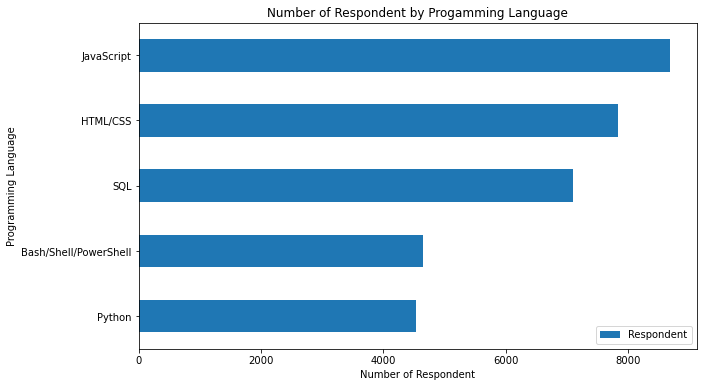

In [20]:
import matplotlib.pyplot as plt

language_curr.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of Respondent') # add to x-label to the plot
plt.ylabel('Programming Language') # add y-label to the plot
plt.title('Number of Respondent by Progamming Language') # add title to the plot

plt.show()

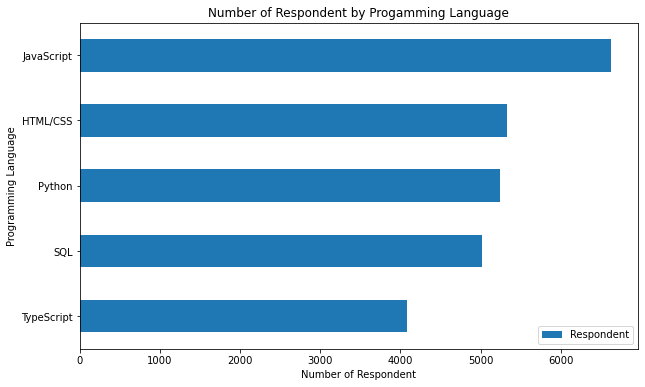

In [22]:
df = pd.read_csv('LanguageDesireNextYear.csv')

language_next = df.groupby('LanguageDesireNextYear').count().sort_values(by='Respondent',ascending=True).tail(5)


language_next.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of Respondent') # add to x-label to the plot
plt.ylabel('Programming Language') # add y-label to the plot
plt.title('Number of Respondent by Progamming Language') # add title to the plot

plt.show()

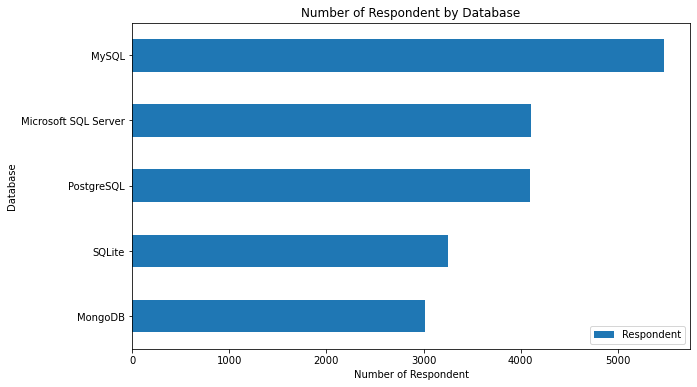

In [23]:
df = pd.read_csv('DatabaseWorkedWith.csv')

db_curr = df.groupby('DatabaseWorkedWith').count().sort_values(by='Respondent',ascending=True).tail(5)


db_curr.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of Respondent') # add to x-label to the plot
plt.ylabel('Database') # add y-label to the plot
plt.title('Number of Respondent by Database') # add title to the plot

plt.show()

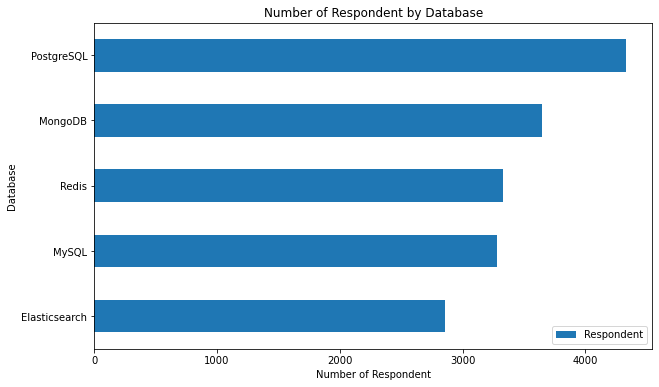

In [24]:
df = pd.read_csv('DatabaseDesireNextYear.csv')

db_next = df.groupby('DatabaseDesireNextYear').count().sort_values(by='Respondent',ascending=True).tail(5)


db_next.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of Respondent') # add to x-label to the plot
plt.ylabel('Database') # add y-label to the plot
plt.title('Number of Respondent by Database') # add title to the plot

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
